In [2]:
include("solutionFunctions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


# Waves on a Ferrofluid Jet

In [5]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialize constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Newton, 5000);

36.1.0e-8.100.Newton
Branch point 10 of 100, 3 iterations.
Branch point 20 of 100, 3 iterations.
Branch point 30 of 100, 3 iterations.
Branch point 40 of 100, 3 iterations.
Branch point 50 of 100, 3 iterations.
Branch point 60 of 100, 3 iterations.
Branch point 70 of 100, 4 iterations.
Branch point 80 of 100, 4 iterations.
Branch point 90 of 100, 4 iterations.
Branch point 100 of 100, 13 iterations.
  2.590824 seconds (159.78 M allocations: 6.216 GiB, 28.27% gc time)


Comparing the different methods:

The best solution (lowest `tol`) that we can compute, for the largest # of modes

In [10]:
## Initialize

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(44,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-12, :NewtonRaphson, 1000);

44.1.0e-12.100.NewtonRaphson


ErrorException: Failed to converge after 1000 iterations

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

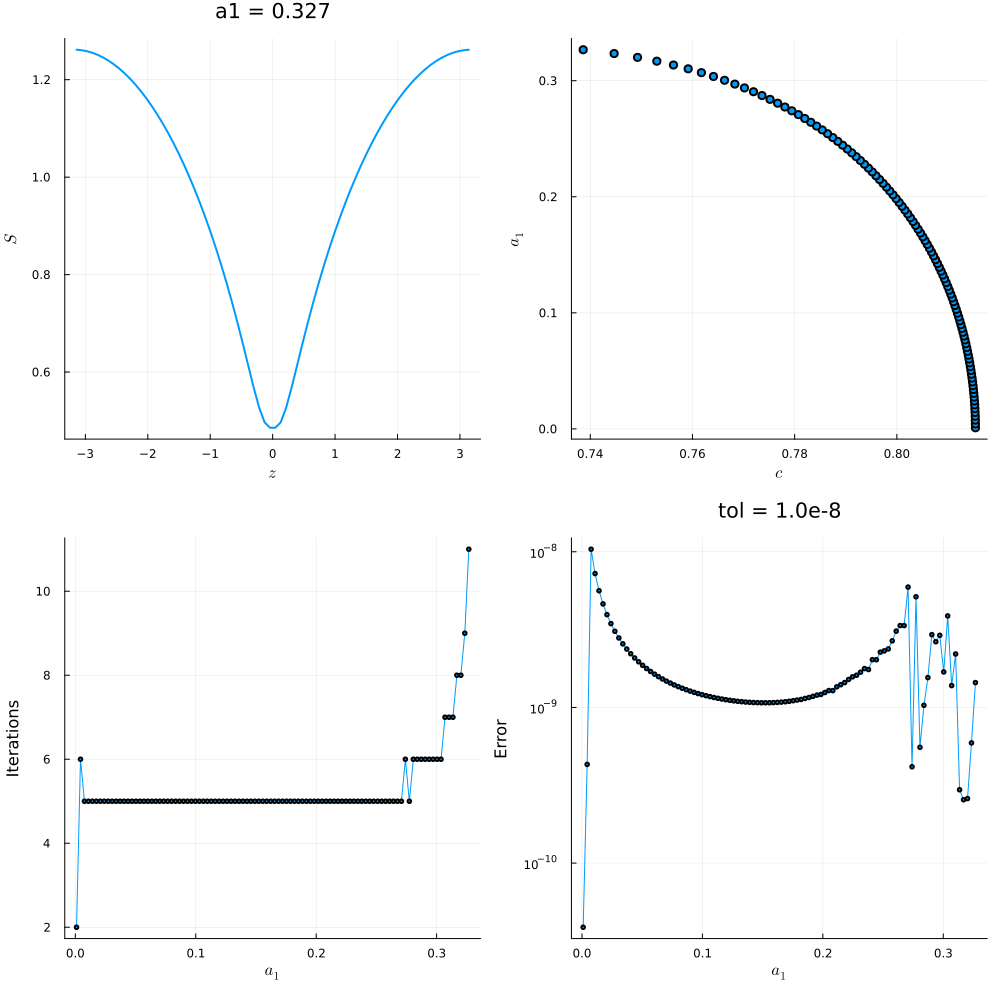

In [11]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("36.1.0e-8.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

In [56]:
# read the metadata for "36.1.0e-8.100.Broyden" using the JSON package
metadata = JSON.parsefile("results/36.1.0e-8.100.Broyden/meta_36.1.0e-8.100.Broyden.json")
metadata["a1Vals"]
metadata["iterations"]

100-element Vector{Any}:
  2.0
  6.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  5.0
  ⋮
  7.0
  6.0
  6.0
  7.0
  7.0
 10.0
  9.0
  9.0
 12.0

In [43]:
# compute solutions for a range of tolerances, branchN and N 
tolerances = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
branchNs = [10, 100, 1000, 10000]
Ns = [8, 10, 12, 14, 16, 18, 24, 32, 36, 38, 64, 128]

# initialize arrays to store time taken
times = zeros(length(tolerances), length(branchNs), length(Ns))

# loop over all combinations of tolerances, branchNs and Ns
for i = 1:length(tolerances)
    for j = 1:length(branchNs)
        for k = 1:length(Ns)
            # initialize constants
            constants = Constants(Ns[k],π,1.5,0.1)
            
            # initialize wave speed and wave number 
            k1 = 1*π/constants.L
            cInitial = c0(k1, constants);
            
            # initial guess 
            initial_guess = (1e-16).*ones(branchNs[j]+1, constants.N+2)
            initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]
            
            # time taken
            times[i,j,k] = @elapsed solutions = bifurcation(initial_guess, a1Vals, branchNs[j], constants, tolerances[i], :Broyden, 20000)
        end
    end
end

8.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 9 iterations.
Branch point 3 of 10, 9 iterations.
Branch point 4 of 10, 8 iterations.
Branch point 5 of 10, 10 iterations.
Branch point 6 of 10, 10 iterations.
Branch point 7 of 10, 10 iterations.
Branch point 8 of 10, 10 iterations.
Branch point 9 of 10, 13 iterations.
Branch point 10 of 10, 16 iterations.
10.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 9 iterations.
Branch point 3 of 10, 9 iterations.
Branch point 4 of 10, 8 iterations.
Branch point 5 of 10, 9 iterations.
Branch point 6 of 10, 10 iterations.
Branch point 7 of 10, 10 iterations.
Branch point 8 of 10, 15 iterations.
Branch point 9 of 10, 14 iterations.
Branch point 10 of 10, 22 iterations.
12.1.0e-8.10.Broyden


CompositeException: TaskFailedException

    nested task error: DomainError with -2.392241758908977:
    `x` must be nonnegative.
    Stacktrace:
      [1] besselk
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:520 [inlined]
      [2] _broadcast_getindex_evalf
        @ ./broadcast.jl:709 [inlined]
      [3] _broadcast_getindex
        @ ./broadcast.jl:682 [inlined]
      [4] _getindex
        @ ./broadcast.jl:706 [inlined]
      [5] _getindex
        @ ./broadcast.jl:705 [inlined]
      [6] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
      [7] _getindex
        @ ./broadcast.jl:706 [inlined]
      [8] _getindex
        @ ./broadcast.jl:705 [inlined]
      [9] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
     [10] getindex
        @ ./broadcast.jl:636 [inlined]
     [11] macro expansion
        @ ./broadcast.jl:1004 [inlined]
     [12] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [13] copyto!
        @ ./broadcast.jl:1003 [inlined]
     [14] copyto!
        @ ./broadcast.jl:956 [inlined]
     [15] copy
        @ ./broadcast.jl:928 [inlined]
     [16] materialize
        @ ./broadcast.jl:903 [inlined]
     [17] macro expansion
        @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:195 [inlined]
     [18] (::var"#302#threadsfor_fun#52"{var"#302#threadsfor_fun#51#53"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [19] #302#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [20] (::Base.Threads.var"#1#2"{var"#302#threadsfor_fun#52"{var"#302#threadsfor_fun#51#53"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 11 more exceptions.


In [38]:
# recompute solutions that have already been computed in the results folder

# get names of the files in the results folder
files = readdir("results")

# loop over the files
for file in files
    
    # get the parameters from the file name (note that the second parameter is the tolerance, which has a decimal point in it, so we need to add the "1" to the start of the string to parse it as a float)
    parameters = split(file, ".")
    N = parse(Int, parameters[1])
    tol = parse(Float64, "1." * parameters[3])
    branchN = parse(Int, parameters[4])
    solver = parameters[5]

    # print each for the first file 
    if file == files[1]
        println("N: ", N)
        println("tol: ", tol)
        println("branchN: ", branchN)
        println("solver: ", solver)
    end

    # initialize everything
    a1Vals = collect(range(0.001, 0.33, branchN + 1))

    # initialze constants
    constants = Constants(N,π,1.5,0.1)

    # initialize wave speed and wave number 
    k1 = 1*π/constants.L
    cInitial = c0(k1, constants);

    # initial guess 
    initial_guess = (1e-16).*ones(branchN+1, constants.N + 2)
    initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

    # solve 
    @time solutions = bifurcation(initial_guess, a1Vals, branchN, constants, tol, Symbol(solver), 40000)


end

N: 10
tol: 1.0e-8
branchN: 10
solver: Broyden
10.1.0e-8.10.Broyden
Branch point 1 of 10, 2 iterations.
Branch point 2 of 10, 9 iterations.
Branch point 3 of 10, 9 iterations.
Branch point 4 of 10, 8 iterations.
Branch point 5 of 10, 9 iterations.
Branch point 6 of 10, 10 iterations.
Branch point 7 of 10, 10 iterations.
Branch point 8 of 10, 15 iterations.
Branch point 9 of 10, 14 iterations.
Branch point 10 of 10, 22 iterations.
  0.034086 seconds (587.22 k allocations: 33.511 MiB, 18.91% gc time, 7.03% compilation time)
32.1.0e-10.10000.Broyden
Branch point 1000 of 10000, 3 iterations.
Branch point 2000 of 10000, 3 iterations.
Branch point 3000 of 10000, 3 iterations.
Branch point 4000 of 10000, 3 iterations.
Branch point 5000 of 10000, 3 iterations.
Branch point 6000 of 10000, 3 iterations.
Branch point 7000 of 10000, 3 iterations.
Branch point 8000 of 10000, 3 iterations.
Branch point 9000 of 10000, 4 iterations.
Branch point 10000 of 10000, 16 iterations.
 70.822813 seconds (3.97 G

CompositeException: TaskFailedException

    nested task error: DomainError with -5.828776209631787:
    `x` must be nonnegative.
    Stacktrace:
      [1] besselk
        @ ~/.julia/packages/SpecialFunctions/QH8rV/src/bessel.jl:520 [inlined]
      [2] _broadcast_getindex_evalf
        @ ./broadcast.jl:709 [inlined]
      [3] _broadcast_getindex
        @ ./broadcast.jl:682 [inlined]
      [4] _getindex
        @ ./broadcast.jl:706 [inlined]
      [5] _getindex
        @ ./broadcast.jl:705 [inlined]
      [6] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
      [7] _getindex
        @ ./broadcast.jl:706 [inlined]
      [8] _getindex
        @ ./broadcast.jl:705 [inlined]
      [9] _broadcast_getindex
        @ ./broadcast.jl:681 [inlined]
     [10] getindex
        @ ./broadcast.jl:636 [inlined]
     [11] macro expansion
        @ ./broadcast.jl:1004 [inlined]
     [12] macro expansion
        @ ./simdloop.jl:77 [inlined]
     [13] copyto!
        @ ./broadcast.jl:1003 [inlined]
     [14] copyto!
        @ ./broadcast.jl:956 [inlined]
     [15] copy
        @ ./broadcast.jl:928 [inlined]
     [16] materialize
        @ ./broadcast.jl:903 [inlined]
     [17] macro expansion
        @ ~/Documents/ferrofluidstabilty/solutions/solutionFunctions.jl:195 [inlined]
     [18] (::var"#302#threadsfor_fun#52"{var"#302#threadsfor_fun#51#53"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}})(tid::Int64; onethread::Bool)
        @ Main ./threadingconstructs.jl:215
     [19] #302#threadsfor_fun
        @ ./threadingconstructs.jl:182 [inlined]
     [20] (::Base.Threads.var"#1#2"{var"#302#threadsfor_fun#52"{var"#302#threadsfor_fun#51#53"{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Irrational{:π}, Float64, Vector{Float64}, UnitRange{Int64}}}, Int64})()
        @ Base.Threads ./threadingconstructs.jl:154

...and 3 more exceptions.


┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

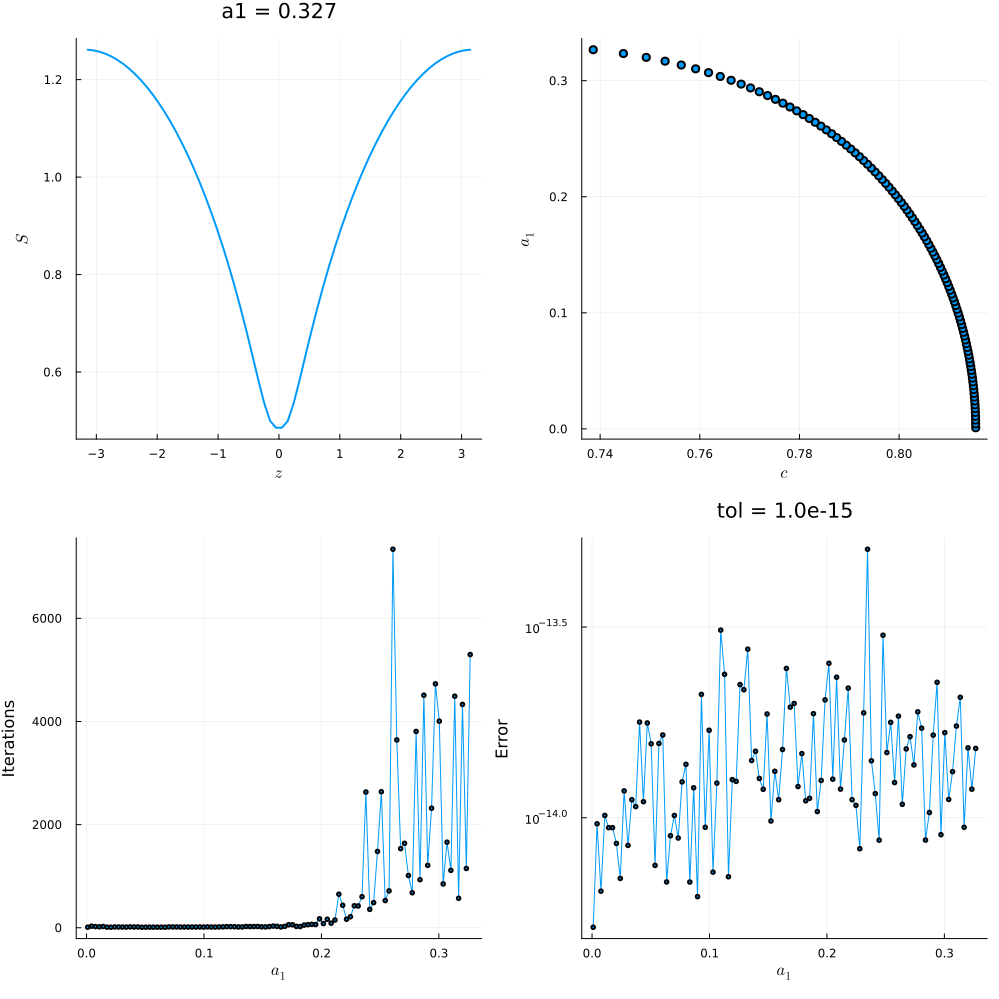

In [3]:
# plot for 32.1.0e-15.100.Broyden
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("32.1.0e-15.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))